# Intro a R
## DataFrames

In [1]:
library(dslabs)
# cargo en murders el dataframe homonimo
data("murders")

# tipo 
class(murders)

[1] "data.frame"

In [7]:
# columnas
names(murders)

[1] "state"      "abb"        "region"     "population" "total"

In [26]:
# veamos su estructura
str(murders)

'data.frame':	51 obs. of  5 variables:
 $ state     : chr  "Alabama" "Alaska" "Arizona" "Arkansas" ...
 $ abb       : chr  "AL" "AK" "AZ" "AR" ...
 $ region    : Factor w/ 4 levels "Northeast","South",..: 2 4 4 2 4 4 1 2 2 2 ...
 $ population: num  4779736 710231 6392017 2915918 37253956 ...
 $ total     : num  135 19 232 93 1257 ...


In [8]:
# cabecera
head(murders)

state,abb,region,population,total
Alabama,AL,South,4779736,135
Alaska,AK,West,710231,19
Arizona,AZ,West,6392017,232
Arkansas,AR,South,2915918,93
California,CA,West,37253956,1257
Colorado,CO,West,5029196,65


In [11]:
# Viendo columnas usando el $ denominado "accesor"
murders$region

[1] South         West          West          South         West         
 [6] West          Northeast     South         South         South        
[11] South         West          West          North Central North Central
[16] North Central North Central South         South         Northeast    
[21] South         Northeast     North Central North Central South        
[26] North Central West          North Central West          Northeast    
[31] Northeast     West          Northeast     South         North Central
[36] North Central South         West          Northeast     Northeast    
[41] South         North Central South         South         West         
[46] Northeast     South         West          South         North Central
[51] West         
Levels: Northeast South North Central West

In [29]:
# otra forma que extraer generando un nuevo dataframe es con corchetes simples
#murders["region"]

In [18]:
# con doble corchetes no genera nuevo objeto sino que es la misma tabla
murders[["region"]]

[1] South         West          West          South         West         
 [6] West          Northeast     South         South         South        
[11] South         West          West          North Central North Central
[16] North Central North Central South         South         Northeast    
[21] South         Northeast     North Central North Central South        
[26] North Central West          North Central West          Northeast    
[31] Northeast     West          Northeast     South         North Central
[36] North Central South         West          Northeast     Northeast    
[41] South         North Central South         South         West         
[46] Northeast     South         West          South         North Central
[51] West         
Levels: Northeast South North Central West

In [28]:
# Ojo, hay tipo de datos llamado Factores, para datos en categorías
class(murders[["region"]])
class(murders[["population"]])
class(murders[["abb"]])

[1] "factor"

[1] "numeric"

[1] "character"

In [23]:
# puedo saber esos Factores cuales son
levels(murders[["region"]]) # es lo mismo que levels(murders$region)

[1] "Northeast"     "South"         "North Central" "West"

In [25]:
# Y los cuento
length(levels(murders[["region"]]))

[1] 4

## Crear DataFrames

In [34]:
# Store temperatures in an object 
temp <- c(35, 88, 42, 84, 81, 30)

# Store city names in an object 
city <- c("Beijing", "Lagos", "Paris", "Rio de Janeiro", "San Juan", "Toronto")

# Create data frame with city names and temperature 
city_temps <- data.frame(name = city, temperature = temp)

Veamos otro ejemplo

In [37]:
notas <- data.frame(nombres  = c("tupac", "calchaqui", "catari"), 
                    examen_1 = c(100,99,70), 
                    examen_2 = c(99,90,100))
notas

nombres,examen_1,examen_2
tupac,100,99
calchaqui,99,90
catari,70,100


Ojo, que los strings son convertidos automaticamente en ``Factors``. Mirá:

In [38]:
class(notas$nombres)

[1] "factor"

Para evitarlo en la definición debemo usar ``stringsAsFactors = FALSE``, así:

In [40]:
notas <- data.frame(nombres  = c("tupac", "calchaqui", "catari"), 
                    examen_1 = c(100,99,70), 
                    examen_2 = c(99,90,100),
                   stringsAsFactors = FALSE)
class(notas$nombres)

[1] "character"

## Vectores
- Son homogéneos
- permiten usar clave=valor 
- inician desde índice 1
- Puedo generar vectores vacíos: ``v <- vector(length=20)`` o ``vector("numeric", 10)``

In [46]:
nums <- c(34, 356.3, 12.1, 12)

In [47]:
ciudades <- c("Santa Fe", "Tostado", "Sastre")
codigos <- c(342,3491,3406)

In [54]:
# las claves con espacios se encierran entre comillas, sino no hace falta
tel_codes <- c("santa fe" = 342, "tostado"=3491, "sastre" = 3406)

In [55]:
# podemos asignarles claves a un vector numérico
names(codigos) <- ciudades

In [53]:
codigos

Santa Fe  Tostado   Sastre 
     342     3491     3406

In [56]:
# Podemos acceder por el nombre de su clave
codigos["Santa Fe"]

Santa Fe 
     342

### Secuencias

In [72]:
# seq(ini,fin,paso)
x <- seq(1,10,0.2)

In [73]:
x

[1]  1.0  1.2  1.4  1.6  1.8  2.0  2.2  2.4  2.6  2.8  3.0  3.2  3.4  3.6  3.8
[16]  4.0  4.2  4.4  4.6  4.8  5.0  5.2  5.4  5.6  5.8  6.0  6.2  6.4  6.6  6.8
[31]  7.0  7.2  7.4  7.6  7.8  8.0  8.2  8.4  8.6  8.8  9.0  9.2  9.4  9.6  9.8
[46] 10.0

In [68]:
## Solamente para secuencias de paso entero ini:fin
x2 <- 10:1

In [69]:
x2

[1] 10  9  8  7  6  5  4  3  2  1

In [12]:
# secuencia desde ini hasta fin, de una determinada cantidad de elementos
a <- seq(0, 1, length.out = 5)


[1] "numeric"

### Slices

In [75]:
codigos[1:3]

Santa Fe  Tostado   Sastre 
     342     3491     3406

In [76]:
codigos[c(1,3)]

Santa Fe   Sastre 
     342     3406

### Coerción 
Ojo con R, que a diferencia de otros lenguajes intenta hacer la mejor alternativa para eviar un error, por ejemplo, convertir datos para no dar un error. Por ejemplo:

In [1]:
v <- c(1,2,3,"Cinco")

convirtió todos los valores ingresados como valores numéricos a caracteres:

In [2]:
v

[1] "1"     "2"     "3"     "Cinco"

Podemos también forzar esta coerción, convirtiendolo manualmente con el uso de por ejemplo **as.character()** o **as.numeric()**:

In [6]:
p <- 1:5
q <- as.character(p)
r <- as.numeric(q)
q
r

[1] "1" "2" "3" "4" "5"

[1] 1 2 3 4 5

[1] 1 2 3 4 5

### Not Available data
Si queremos convertir algo imposible, entonces aparece el tipo de dato Not Available,  NA.

In [9]:
y <- c('1', '2')
as.numeric(c)

ERROR: Error in as.numeric(c): cannot coerce type 'builtin' to vector of type 'double'


In [41]:
# Cargamos otro dataset con varios NAs
data(na_example)
# veo la estructura
str(na_example)
# devuelve indices con TRUE o FALSE según halle NAs
ind <- is.na(na_example)
# puedo sumarlos para saber cuantos NAs hay
sum(ind)

 int [1:1000] 2 1 3 2 1 3 1 4 3 2 ...


[1] 145

In [42]:
# no se puede calcular el promedio con valores NA
mean(na_example)

# Compute the average, for entries of na_example that are not NA 
mean(na_example[!ind])

[1] NA

[1] 2.301754

## Ordenamiento

### sort

In [16]:
sort(murders$total)

[1]    2    4    5    5    7    8   11   12   12   16   19   21   22   27   32
[16]   36   38   53   63   65   67   84   93   93   97   97   99  111  116  118
[31]  120  135  142  207  219  232  246  250  286  293  310  321  351  364  376
[46]  413  457  517  669  805 1257

### order y rank

**order** devuelve un vector con los índices de los valores ordenados. Es útil para ordenar una tabla por alguna columna en especial.

**rank** devuelve la posición que tiene cada elemento del vector original en el ordenado, qué posición de *ranking* ocupa. Por ejemplo, el ``rank`` de un vector que tiene ``c(10, 100, 1)`` devolvería ``c(2,3,1)``

In [18]:
x <- c(12, 10, 11)
indices <- order(x)
indices

[1] 2 3 1

In [22]:
x[indices]

[1] 10 11 12

Por ejemplo que queremos **ordenar el dataframe por el total de homicidios** y luego mostrar cada columna según este mismo orden:

In [24]:
indices <- order(murders$total)
murders$total[indices]

[1]    2    4    5    5    7    8   11   12   12   16   19   21   22   27   32
[16]   36   38   53   63   65   67   84   93   93   97   97   99  111  116  118
[31]  120  135  142  207  219  232  246  250  286  293  310  321  351  364  376
[46]  413  457  517  669  805 1257

In [25]:
# ahora vemos los estados
murders$state[indices]

[1] "Vermont"              "North Dakota"         "New Hampshire"       
 [4] "Wyoming"              "Hawaii"               "South Dakota"        
 [7] "Maine"                "Idaho"                "Montana"             
[10] "Rhode Island"         "Alaska"               "Iowa"                
[13] "Utah"                 "West Virginia"        "Nebraska"            
[16] "Oregon"               "Delaware"             "Minnesota"           
[19] "Kansas"               "Colorado"             "New Mexico"          
[22] "Nevada"               "Arkansas"             "Washington"          
[25] "Connecticut"          "Wisconsin"            "District of Columbia"
[28] "Oklahoma"             "Kentucky"             "Massachusetts"       
[31] "Mississippi"          "Alabama"              "Indiana"             
[34] "South Carolina"       "Tennessee"            "Arizona"             
[37] "New Jersey"           "Virginia"             "North Carolina"      
[40] "Maryland"             "Ohio"                 "Missouri"            
[43] "Louisiana"            "Illinois"             "Georgia"             
[46] "Michigan"             "Pennsylvania"         "New York"            
[49] "Florida"              "Texas"                "California"

In [37]:
# ejemplo de rank
x <- c(10, 100, 1)
rank(x)

[1] 2 3 1

Por ejemplo, quiero armar un dataframe que tenga 2 columnas, los nombres de los estados y el ranking de población:

In [36]:
# Define a variable states to be the state names 
states <- murders$state

# Define a variable ranks to determine the population size ranks 
ranks <- rank(murders$population)

# Armo el dataframe
my_df <- data.frame(state_name = states, rank_population = ranks)  
head(my_df)

state_name,rank_population
Alabama,29
Alaska,5
Arizona,36
Arkansas,20
California,51
Colorado,30


Si quisiera mostrar los estados y el ranking de cada estado según su población

In [ ]:
# Define a variable states to be the state names from the murders data frame
states <- murders$state

# Define a variable ranks to determine the population size ranks 
ranks <- rank(murders$population)

# Define a variable ind to store the indexes needed to order the population values
ind <- order(murders$population)

# Create a data frame my_df with the state name and its rank and ordered from least populous to most 
my_df = data.frame(state_name = states[ind], population_rank = ranks[ind])

### Máximos o mínimos
``max() / min()`` devuelve el valor máximo/mínimo de un vector o columna, por ej

In [26]:
max(murders$total)

[1] 1257

Para saber en qué índice está ese máximo/mínimo, ``which.max()/wich.min()``

In [28]:
i_max <- which.max(murders$total)
i_max
murders$state[i_max]

[1] 5

[1] "California"

In [44]:
# Estado de mayor población en una sola línea
murders$state[which.max(murders$population)]

[1] "California"

## Aritmética de vectores

In [2]:
# Tasa de asesinatos cada 100 mil habitantes
murder_rate <- murders$total/murders$population * 100000
murder_rate

[1]  2.8244238  2.6751860  3.6295273  3.1893901  3.3741383  1.2924531
 [7]  2.7139722  4.2319369 16.4527532  3.3980688  3.7903226  0.5145920
[13]  0.7655102  2.8369608  2.1900730  0.6893484  2.2081106  2.6732010
[19]  7.7425810  0.8280881  5.0748655  1.8021791  4.1786225  0.9992600
[25]  4.0440846  5.3598917  1.2128379  1.7521372  3.1104763  0.3798036
[31]  2.7980319  3.2537239  2.6679599  2.9993237  0.5947151  2.6871225
[37]  2.9589340  0.9396843  3.5977513  1.5200933  4.4753235  0.9825837
[43]  3.4509357  3.2013603  0.7959810  0.3196211  3.1246001  1.3829942
[49]  1.4571013  1.7056487  0.8871131

In [50]:
# Listado de tasa de asesinatos por estado en formato ascendente
murders$state[order(murder_rate)]

[1] "Vermont"              "New Hampshire"        "Hawaii"              
 [4] "North Dakota"         "Iowa"                 "Idaho"               
 [7] "Utah"                 "Maine"                "Wyoming"             
[10] "Oregon"               "South Dakota"         "Minnesota"           
[13] "Montana"              "Colorado"             "Washington"          
[16] "West Virginia"        "Rhode Island"         "Wisconsin"           
[19] "Nebraska"             "Massachusetts"        "Indiana"             
[22] "Kansas"               "New York"             "Kentucky"            
[25] "Alaska"               "Ohio"                 "Connecticut"         
[28] "New Jersey"           "Alabama"              "Illinois"            
[31] "Oklahoma"             "North Carolina"       "Nevada"              
[34] "Virginia"             "Arkansas"             "Texas"               
[37] "New Mexico"           "California"           "Florida"             
[40] "Tennessee"            "Pennsylvania"         "Arizona"             
[43] "Georgia"              "Mississippi"          "Michigan"            
[46] "Delaware"             "South Carolina"       "Maryland"            
[49] "Missouri"             "Louisiana"            "District of Columbia"

In [51]:
# Listado de tasa de asesinatos por estado en formato DESCENDENTE
murders$state[order(murder_rate, decreasing=TRUE)]

[1] "District of Columbia" "Louisiana"            "Missouri"            
 [4] "Maryland"             "South Carolina"       "Delaware"            
 [7] "Michigan"             "Mississippi"          "Georgia"             
[10] "Arizona"              "Pennsylvania"         "Tennessee"           
[13] "Florida"              "California"           "New Mexico"          
[16] "Texas"                "Arkansas"             "Virginia"            
[19] "Nevada"               "North Carolina"       "Oklahoma"            
[22] "Illinois"             "Alabama"              "New Jersey"          
[25] "Connecticut"          "Ohio"                 "Alaska"              
[28] "Kentucky"             "New York"             "Kansas"              
[31] "Indiana"              "Massachusetts"        "Nebraska"            
[34] "Wisconsin"            "Rhode Island"         "West Virginia"       
[37] "Washington"           "Colorado"             "Montana"             
[40] "Minnesota"            "South Dakota"         "Oregon"              
[43] "Wyoming"              "Maine"                "Utah"                
[46] "Idaho"                "Iowa"                 "North Dakota"        
[49] "Hawaii"               "New Hampshire"        "Vermont"

**Ejemplo de la igualdad de euler: ** $\pi^2/6 = 1 + 1/2^2 + 1/3^2 +...$

In [56]:
x <- 1:1000
pi_aprox <- sqrt(6*sum(1/(x^2)))
pi_aprox

[1] 3.140638

## Indexing

Generamos un vector de Booleanos, en el que el dataframe cumple con determinadas condiciones

In [16]:
index <- murder_rate <= 1 & murders$region == "West"
sum(index)

[1] 5

In [17]:
murders$state[index]

[1] "Hawaii"  "Idaho"   "Oregon"  "Utah"    "Wyoming"

### Indexing functions

#### ``which()`` 

retorna un vector con los índices que son ``TRUE``. Esto es útil si tenemos un vecot inmenso y queremos solamente obtener aquellos que no son falsos, no el vector entero.

In [20]:
a <- c(TRUE, FALSE, TRUE, FALSE, FALSE, TRUE, TRUE)
which(a)

[1] 1 3 6 7

siguiendo el ejemplo previo:

In [22]:
index <- which(murders$state == "Massachusetts")
index

[1] 22

In [23]:
murder_rate[index]

[1] 1.802179

#### match
Devuelve los índices que coinciden con un vector de patrones de búsqueda, por ejemplo queremos obtener los índices de los estados New York, Florida y Texas

In [25]:
index <- match(c("New York", "Florida", "Texas"), murders$state)
index

[1] 33 10 44

In [27]:
murders$state[index]

[1] "New York" "Florida"  "Texas"

In [28]:
murder_rate[index]

[1] 2.667960 3.398069 3.201360

#### %in%
Para saber aquellos elementos de un vector que se encuentran en otro

In [30]:
x <- c("a", "b", "c", "d", "e")
y <- c("x", "a", "y", "e")
y %in% x

[1] FALSE  TRUE FALSE  TRUE

In [32]:
# si quiero saber si estos estados en murders
c("Boston", "Dakota", "Washington") %in% murders$state

[1] FALSE FALSE  TRUE

## Operadores lógicos
- ! not
- & and

In [33]:
!(y %in% x)

[1]  TRUE FALSE  TRUE FALSE

## dplyr package
Mas comunes operaciones en manipulación de datos

In [43]:
library(dplyr)
# filter, select, 

### mutate
Para agregar una columna o cambiar una existente

In [45]:
murders <- mutate(murders, rate=total/population*100000)
head(murders)

state,abb,region,population,total,rate
Alabama,AL,South,4779736,135,2.824424
Alaska,AK,West,710231,19,2.675186
Arizona,AZ,West,6392017,232,3.629527
Arkansas,AR,South,2915918,93,3.189390
California,CA,West,37253956,1257,3.374138
Colorado,CO,West,5029196,65,1.292453


### filter
Filtrar datos por un subconjunto de **filas**

In [46]:
filter(murders, rate<0.7)

state,abb,region,population,total,rate
Hawaii,HI,West,1360301,7,0.5145920
Iowa,IA,North Central,3046355,21,0.6893484
New Hampshire,NH,Northeast,1316470,5,0.3798036
North Dakota,ND,North Central,672591,4,0.5947151
Vermont,VT,Northeast,625741,2,0.3196211


In [51]:
no_south <- filter(murders, region != "South")
# Use nrow() to calculate the number of rows
nrow(no_south)
#nchar nos da la cantidad de caracteres de una cadea

[1] 34

In [50]:
# Create a new data frame called murders_nw with only the states from the northeast and the west
murders_nw <- filter(murders, region %in% c("Northeast", "West"))
# Number of states (rows) in this category 
nrow(murders_nw)

[1] 22

### select
Filtrar datos seleccionando un subconjunto de **columnas**

In [48]:
nueva_tabla <- select(murders, state, region, rate)
head(nueva_tabla)

state,region,rate
Alabama,South,2.824424
Alaska,West,2.675186
Arizona,West,3.629527
Arkansas,South,3.189390
California,West,3.374138
Colorado,West,1.292453


In [56]:
# add the rate column
murders <- mutate(murders, rate =  total / population * 100000, rank = rank(-rate))

# Create a table, call it my_states, that satisfies both the conditions 
my_states <- filter(murders, rate<1 & region %in% c("Northeast","West"))
# Use select to show only the state name, the murder rate and the rank
select(my_states, state, rate, rank)

state,rate,rank
Hawaii,0.5145920,49
Idaho,0.7655102,46
Maine,0.8280881,44
New Hampshire,0.3798036,50
Oregon,0.9396843,42
Utah,0.7959810,45
Vermont,0.3196211,51
Wyoming,0.8871131,43


### pipe operator  %>%
Opera la salida de un comando como entrada de la otra, por lo tanto en ``select()`` y ``filter()`` no usamos como primer argumento la tabla de entrada. Basicamente evitamos crear tablas intermedias como la ``nueva_tabla`` previa

El mismo resultado que la última celda del ``select``

In [57]:
filter(murders, rate<1 & region %in% c("Northeast","West")) %>% select(state, rate, rank)

state,rate,rank
Hawaii,0.5145920,49
Idaho,0.7655102,46
Maine,0.8280881,44
New Hampshire,0.3798036,50
Oregon,0.9396843,42
Utah,0.7959810,45
Vermont,0.3196211,51
Wyoming,0.8871131,43


In [54]:
# tooodo lo anterior en una única línea usando tuberías
my_states <- murders %>% mutate(rate =  total / population * 100000, rank = rank(-rate)) %>% filter(rate<1 & region %in% c("Northeast","West")) %>% select(state, rate, rank)

In [55]:
my_states

state,rate,rank
Hawaii,0.5145920,49
Idaho,0.7655102,46
Maine,0.8280881,44
New Hampshire,0.3798036,50
Oregon,0.9396843,42
Utah,0.7959810,45
Vermont,0.3196211,51
Wyoming,0.8871131,43


## Plot

### Scatter

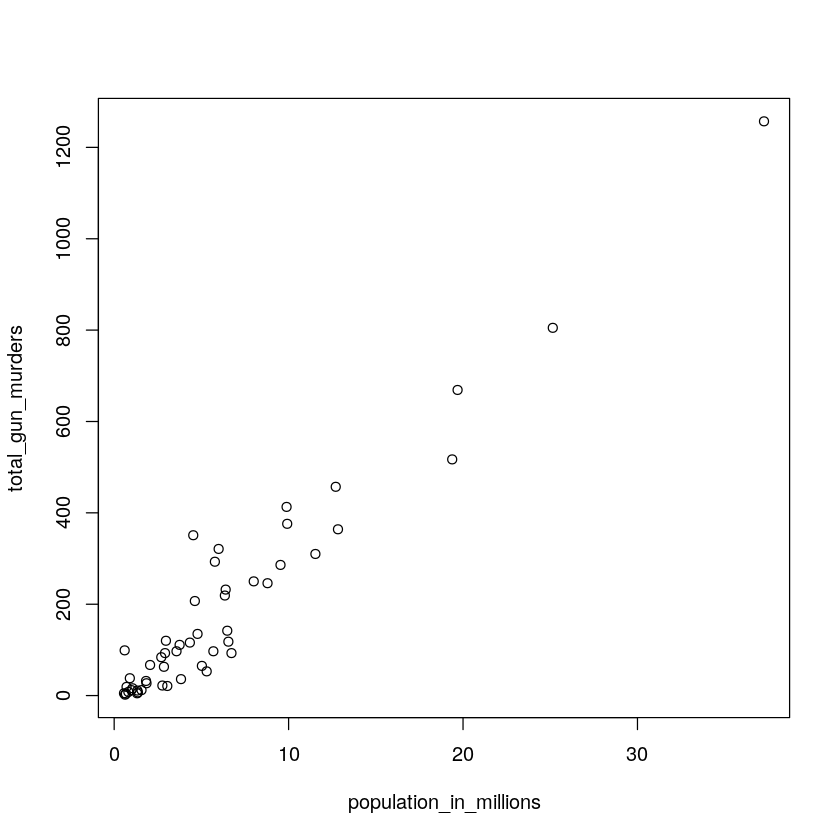

In [58]:
population_in_millions <- murders$population/10^6
total_gun_murders <- murders$total
plot(population_in_millions, total_gun_murders)

### Histograma

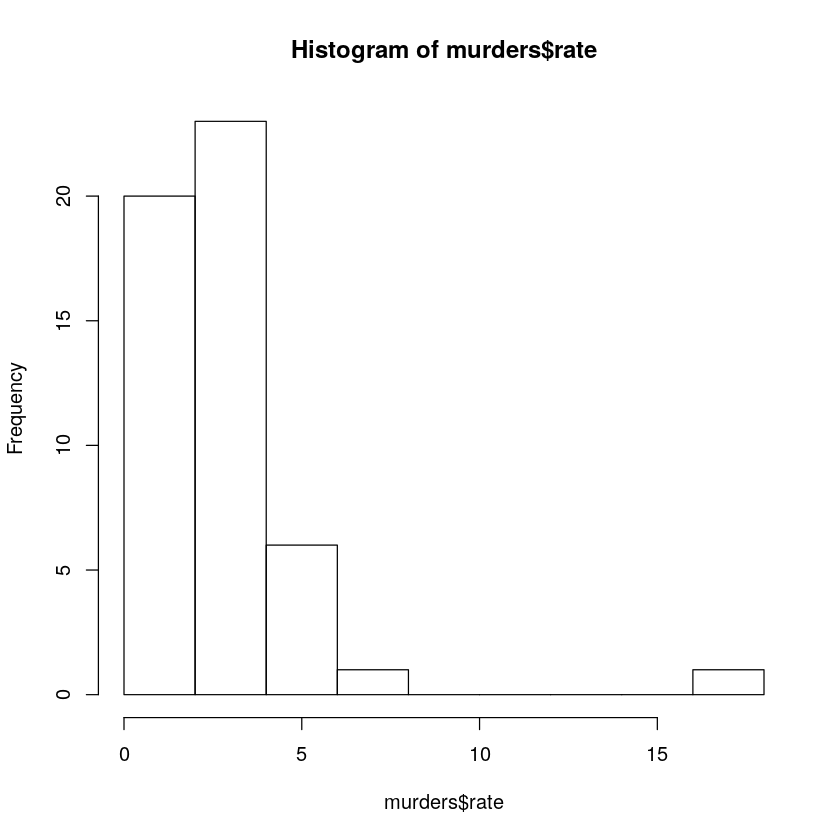

In [59]:
hist(murders$rate)

### Boxplot

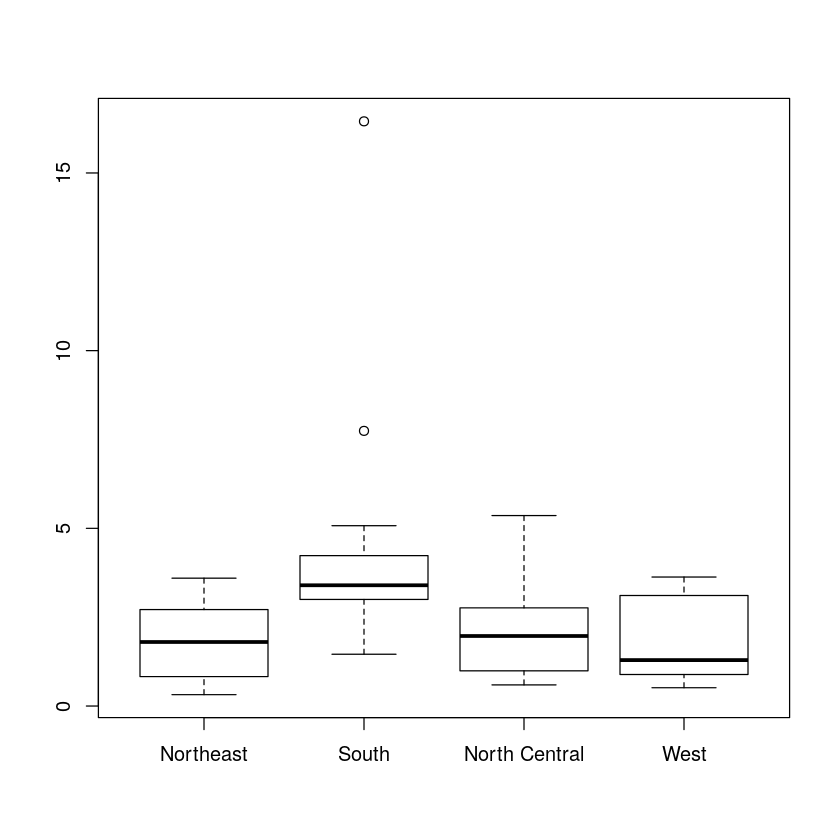

In [61]:
boxplot(rate~region, data = murders)

### lines
va luego del plot

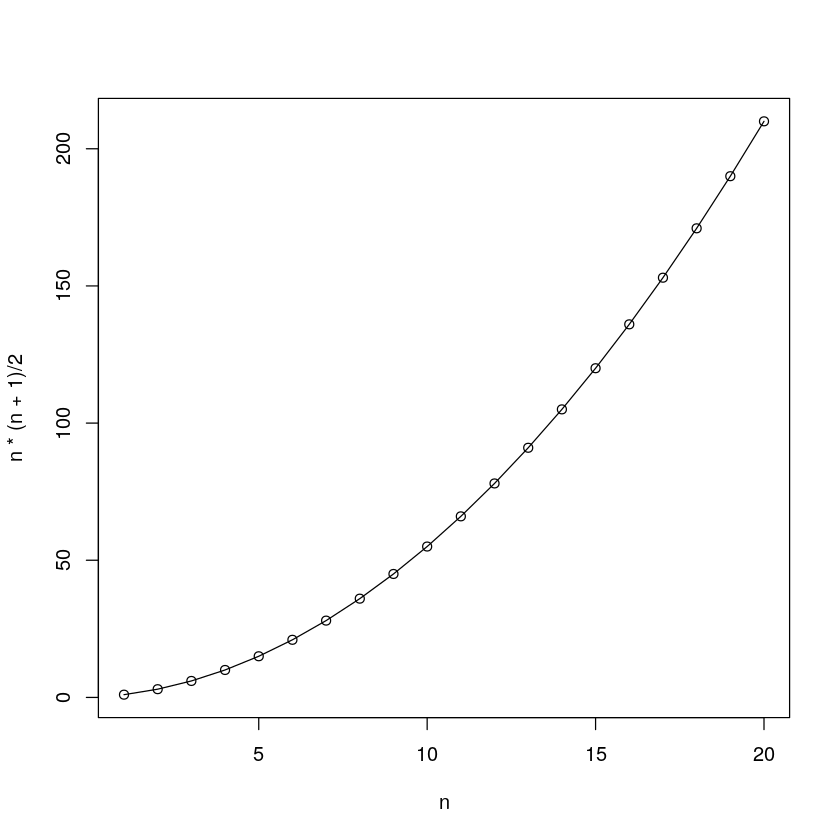

In [95]:
n <- 1:20
plot(n, n*(n+1)/2)
lines(n, n*(n+1)/2)

## Control de flujo
### if-else

In [63]:
ind <- which.min(murder_rate)
if (murder_rate[ind] < 0.25){
    print(murders$state[ind])
}else{
    print("no hay estado con tasa menor a esa")
}

[1] "no hay estado con tasa menor a esa"


### ifelse 
función ifelse que **funciona con vectores**

In [64]:
a<-0
ifelse(a>0,1/a,NA)

[1] NA

In [65]:
a <- c(0,2,3,0,5)
ifelse(a>0,1/a,NA)

[1]        NA 0.5000000 0.3333333        NA 0.2000000

útil para reemplazar valors NA con alguno predeterminado, por ejemplo con el dataset na_example:

In [76]:
data(na_example)

# veamos cuantos NAs hay
sum(is.na(na_example))

# reemplazo con 0 los NAs
no_nas <- ifelse(is.na(na_example), 0, na_example)

# y ahora, no hay ninguno
sum(is.na(no_nas))

[1] 145

[1] 0

### any / all
retornan ``TRUE`` o ``FALSE``, para ``any`` si hay algún elemento ``TRUE``, y para ``all``, si todos son ``TRUE``

In [77]:
a <- c(TRUE, FALSE, FALSE)
b <- c(TRUE, TRUE)
c <- c(FALSE, FALSE)
any(a)
any(b)
any(c)

all(a)
all(b)
all(c)

[1] TRUE

[1] TRUE

[1] FALSE

[1] FALSE

[1] TRUE

[1] FALSE

### For Loops
- Muy parecido a python, itera hasta el último valor de la secuencia
- En lenguajes vectorizados no tiene taaaaanto goyete como en otros.

In [87]:
for (i in 1:5){
    print(i)
}

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5


Hay funciones que típicamente son usadas en vez de los for: **apply, sapply, tapply, mapply, slit, cut, quantile, reduce, identical, unique**

## Funciones
- La **línea final** es la que se retorna. 
- Las variables creadas dentro de la función viven dentro de ella nomás
- Son objetos

In [82]:
# promedio aritmético
avg <- function(x){
    s <- sum(x)
    n <- length(x)
    s/n
}

In [83]:
avg(murders$population)

[1] 6075769

Por ejemplo usemos un 2do argumento para ver si usa el promedio aritmético o geométrico

In [84]:
# promedio aritmético o geométrico 
avg <- function(x, arithmetic=TRUE){
    n<- length(x)
    ifelse(arithmetic,sum(x)/n, prod(x)^(1/n))
}

In [86]:
avg(1:5, FALSE)

[1] 2.605171